# Goals


### Understand the role of using pretrained weights in transfer learning


### Use comparison feature to appropriately set this parameter on custom dataset


### You will be using bird species classification dataset to train the classifiers

# What are pretrained weights


    - The Network is initially trained on a huge dataset like imagenet, coco, etc
    
    - The traned weights are saved and the final classification layer, containing number of neurons as number  of classes, is removed. 
    
    - This pre-trained network is nothing but a feature extractor.
    
    - Using pre-trained weights helps as it know which features to look for
    
    - Alternative to this is to initialize the weights using random distrubitions like normal, xavier, distributions

# Table of Contents


## [0. Install](#0)


## [1. Use pre-trained weights and train a classifier](#1)


## [2. Use randomly initialized weights and train another classifier](#2)


## [3. Compare both the experiment](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 3465 (delta 36), reused 71 (delta 8), pack-reused 3352
Receiving objects: 100% (3465/3465), 106.68 MiB | 3.37 MiB/s, done.
Resolving deltas: 100% (2030/2030), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Bird species classification
    - https://www.kaggle.com/gpiosenka/100-bird-species

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xIz6KKVnt1OUUkx0tkKdyPEQD0kgt8QR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xIz6KKVnt1OUUkx0tkKdyPEQD0kgt8QR" -O 100-bird-species.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq 100-bird-species.zip

# Imports

In [2]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [3]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Use pretrained weights in densenet121 and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [4]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Pretrained");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Use_Pretrained
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Pretrained/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Use_Pretrained
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

## Set dataset and select the model

      
## Sample Dataset folder structure

    100-bird-species
        |
        |
        |----train
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)'
        |
        |
        |-----valid
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)

In [5]:
gtf.Default(dataset_path="100-bird-species/train", 
            model_name="densenet121", 
            freeze_base_network=False,   
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     100-bird-species/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 13841
    Num val images:   5933
    Num classes:      150

Model Params
    Model name:           densenet121
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        Num of actual

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:           densenet121
        Use Gpu:              True
        
        
        Use pretrained:       True
        
        
        Freeze base network:  False

## Default is using pretrained networks

## Train the classifier

In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.622, Train-loss: 1.806 | Val-acc: 0.822855, Val-loss: 0.794, | time: 262.3 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.895, Train-loss: 0.507 | Val-acc: 0.878308, Val-loss: 0.534, | time: 252.1 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.933, Train-loss: 0.315 | Val-acc: 0.902916, Val-loss: 0.420, | time: 252.4 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.957, Train-loss: 0.212 | Val-acc: 0.918254, Val-loss: 0.354, | time: 255.0 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.974, Train-loss: 0.144 | Val-acc: 0.926176, Val-loss: 0.327, | time: 257.5 sec

    Training completed in: 21m 18s
    Best val Acc:          0.926176

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Pretrained/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Pretrained/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_histor

<Figure size 432x288 with 0 Axes>

## Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Pretrained", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Project/Use_Pretrained/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Use_Pretrained
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Pretrained/



## Load the validation dataset

In [8]:
gtf.Dataset_Params(dataset_path="100-bird-species/valid");
gtf.Dataset();

Dataset Details
    Test path:      100-bird-species/valid
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 750
    Num classes:      150



## Run validation

In [9]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. ALBATROSS - 100.0 %
            1. ALEXANDRINE PARAKEET - 100.0 %
            2. AMERICAN AVOCET - 100.0 %
            3. AMERICAN BITTERN - 100.0 %
            4. AMERICAN COOT - 100.0 %
            5. AMERICAN GOLDFINCH - 100.0 %
            6. AMERICAN KESTREL - 100.0 %
            7. AMERICAN REDSTART - 100.0 %
            8. ANHINGA - 100.0 %
            9. ANNAS HUMMINGBIRD - 100.0 %
            10. BALD EAGLE - 100.0 %
            11. BALTIMORE ORIOLE - 100.0 %
            12. BANANAQUIT - 100.0 %
            13. BAR-TAILED GODWIT - 100.0 %
            14. BARN OWL - 100.0 %
            15. BARN SWALLOW - 100.0 %
            16. BAY-BREASTED WARBLER - 100.0 %
            17. BELTED KINGFISHER - 100.0 %
            18. BIRD OF PARADISE - 100.0 %
            19. BLACK FRANCOLIN - 80.0 %
            20. BLACK SKIMMER - 100.0 %
            21. BLACK SWAN - 100.0 %
            22. BLACK THROATED WARBLER - 100.0 %
            2

### Accuracy achieved - 98.4
(You may get a different result)

<a id='2'></a>
# Use randomly initialized weights and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [10]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Random_Initialization");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Use_Random_Initialization
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Random_Initialization/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Use_Pretrained (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Use_Random_Initialization (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

       
## Sample Dataset folder structure

    100-bird-species
        |
        |
        |----train
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)'
        |
        |
        |-----valid
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)

In [11]:
gtf.Default(dataset_path="100-bird-species/train", 
            model_name="densenet121", 
            freeze_base_network=False,  
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     100-bird-species/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 13841
    Num val images:   5933
    Num classes:      150

Model Params
    Model name:           densenet121
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        Num of actual

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:           densenet121
        Use Gpu:              True
        Use pretrained:       True
        
        
        Freeze base network:  False

## Switch to random initialization of network

In [12]:
gtf.update_use_pretrained(False);

# Very important to reload post updates
gtf.Reload();

Update: Use pretrained - False

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 13841
    Num val images:   5933
    Num classes:      150

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        Num of actual trainable layers:       242



/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/mxnet/gluon/parameter.py:862: UserWarning: Parameter 'densenet2_dense1_bias' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


## Train the classifier

In [13]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.050, Train-loss: 4.558 | Val-acc: 0.083432, Val-loss: 4.186, | time: 254.4 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.130, Train-loss: 3.917 | Val-acc: 0.173437, Val-loss: 3.688, | time: 252.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.205, Train-loss: 3.456 | Val-acc: 0.242373, Val-loss: 3.290, | time: 253.0 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.287, Train-loss: 3.049 | Val-acc: 0.309287, Val-loss: 2.950, | time: 253.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.364, Train-loss: 2.695 | Val-acc: 0.371144, Val-loss: 2.656, | time: 252.6 sec

    Training completed in: 21m 5s
    Best val Acc:          0.371144

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Random_Initialization/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Random_Initialization/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:   

<Figure size 432x288 with 0 Axes>

## Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [14]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Random_Initialization", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Project/Use_Random_Initialization/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Use_Random_Initialization
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Random_Initialization/



## Load the validation dataset

In [15]:
gtf.Dataset_Params(dataset_path="100-bird-species/valid");
gtf.Dataset();

Dataset Details
    Test path:      100-bird-species/valid
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 750
    Num classes:      150



## Run validation

In [16]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. ALBATROSS - 0.0 %
            1. ALEXANDRINE PARAKEET - 40.0 %
            2. AMERICAN AVOCET - 60.0 %
            3. AMERICAN BITTERN - 20.0 %
            4. AMERICAN COOT - 60.0 %
            5. AMERICAN GOLDFINCH - 60.0 %
            6. AMERICAN KESTREL - 0.0 %
            7. AMERICAN REDSTART - 0.0 %
            8. ANHINGA - 60.0 %
            9. ANNAS HUMMINGBIRD - 100.0 %
            10. BALD EAGLE - 40.0 %
            11. BALTIMORE ORIOLE - 100.0 %
            12. BANANAQUIT - 40.0 %
            13. BAR-TAILED GODWIT - 60.0 %
            14. BARN OWL - 40.0 %
            15. BARN SWALLOW - 60.0 %
            16. BAY-BREASTED WARBLER - 20.0 %
            17. BELTED KINGFISHER - 60.0 %
            18. BIRD OF PARADISE - 40.0 %
            19. BLACK FRANCOLIN - 0.0 %
            20. BLACK SKIMMER - 40.0 %
            21. BLACK SWAN - 100.0 %
            22. BLACK THROATED WARBLER - 20.0 %
            23. BLACK-CAPPED CHICKAD

### Accuracy achieved - 45.06
(You may get a different result)

<a id='3'></a>
# Compare both the experiment

In [17]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [18]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-using-pretrained-model");

Comparison: - Compare-effect-of-using-pretrained-model


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-using-pretrained-model
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [19]:
gtf.Add_Experiment("Project", "Use_Pretrained");
gtf.Add_Experiment("Project", "Use_Random_Initialization");

Project - Project, Experiment - Use_Pretrained added
Project - Project, Experiment - Use_Random_Initialization added


### Run Analysis

In [20]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

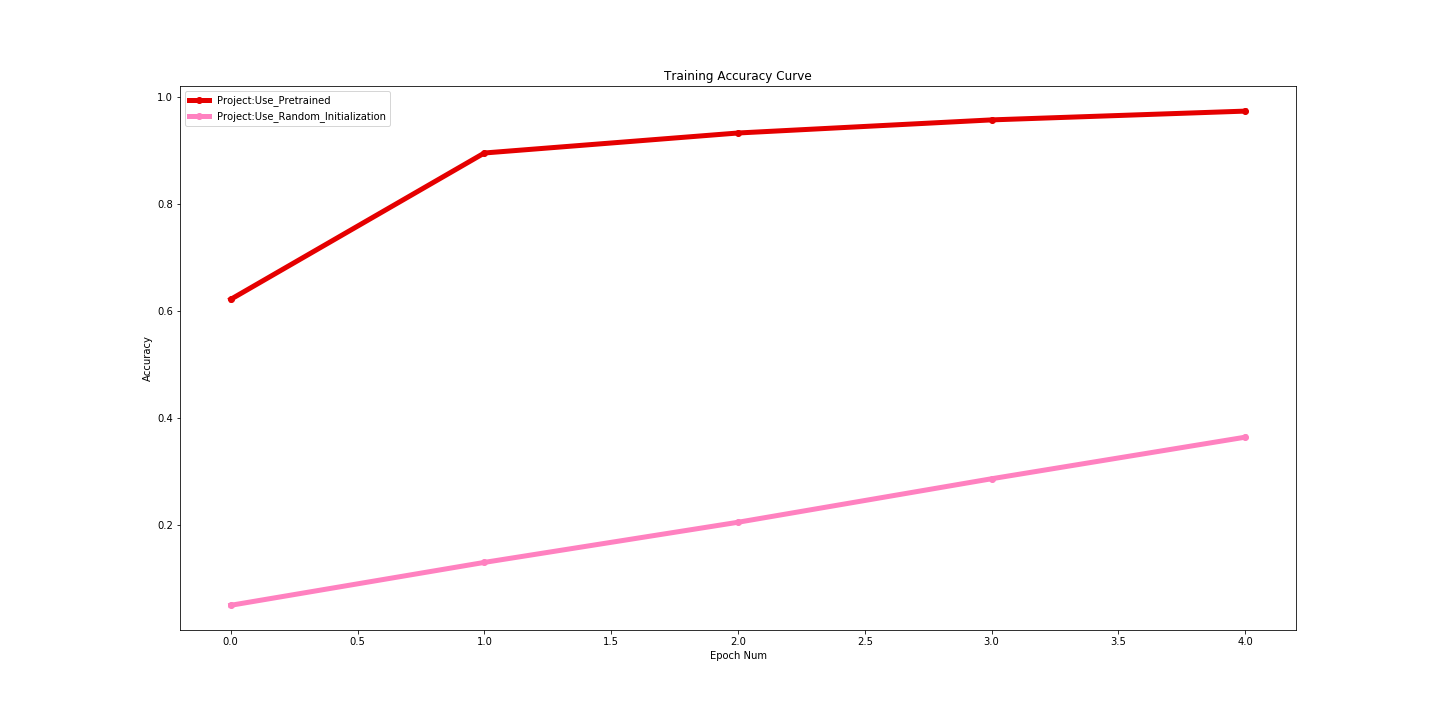

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/train_accuracy.png") 

### Training Loss Curves

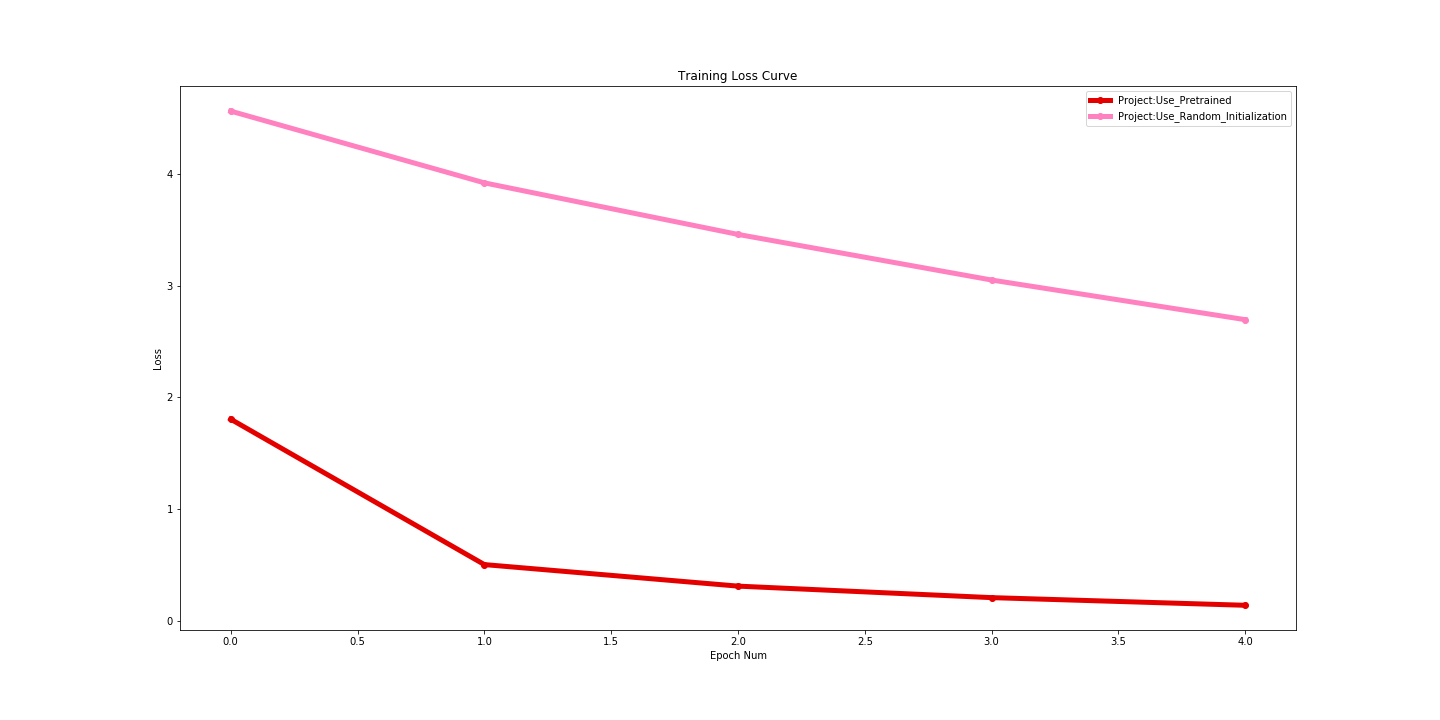

In [22]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/train_loss.png") 

### Validation Accuracy Curves

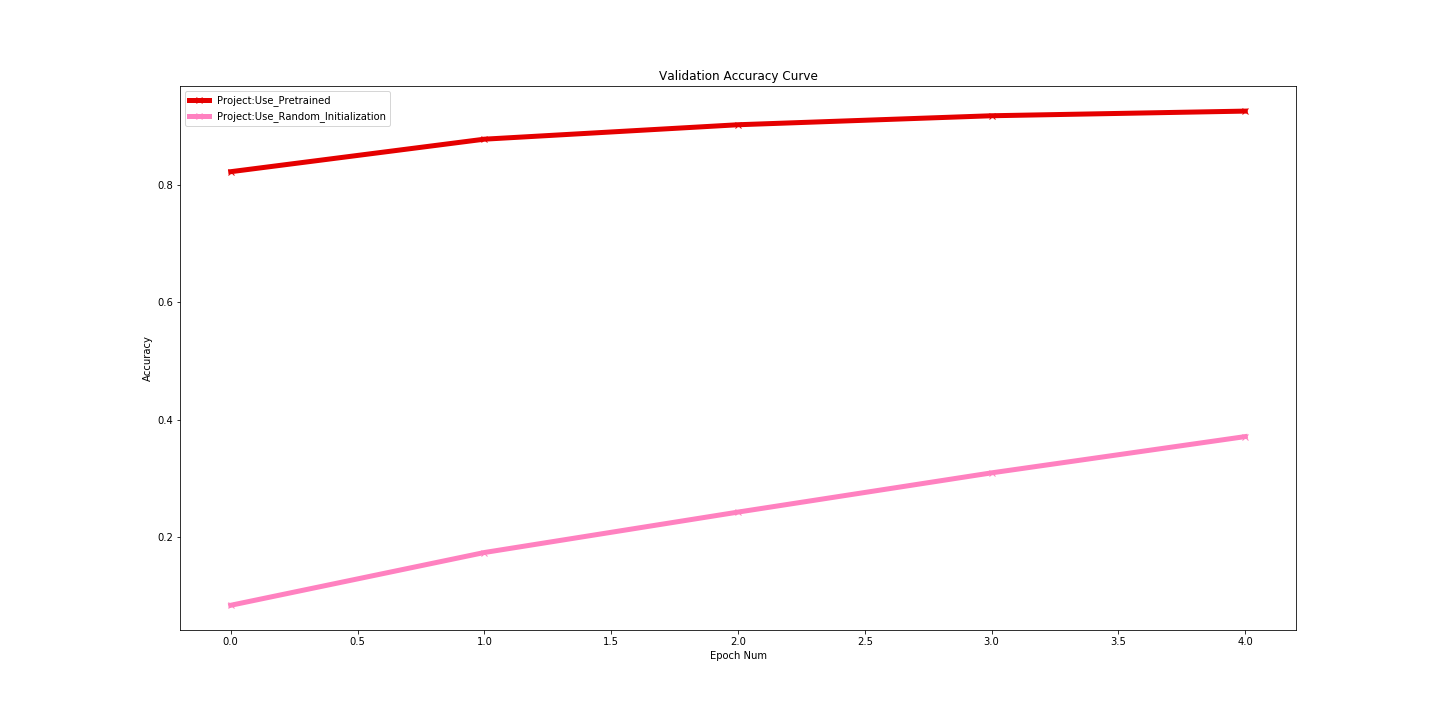

In [23]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/val_accuracy.png") 

### Validation loss curves

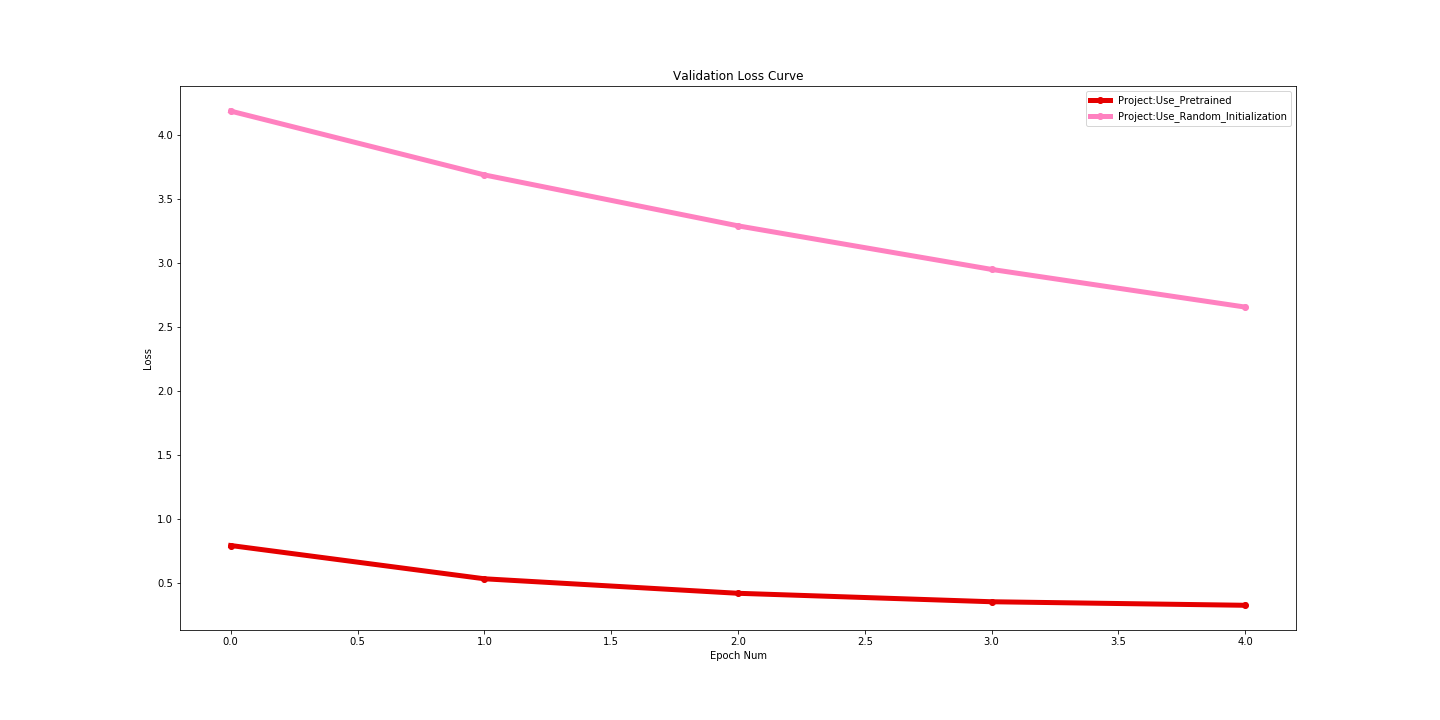

In [24]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/val_loss.png") 

## Accuracies achieved on validation dataset

### With pretrained weights - 98.063
### Without pretrained weights - 45.06

#### For this classifier, keeping the base network inistalized with pretrained weights seems to be a good option for lesser epochs. 

(You may get a different result)